In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# Constants

In [2]:
label_annotations = ["left eye center",
                     "right eye center",
                     "left eye inner corner",
                     "left eye outer corner", 
                     "right eye inner corner", 
                     "right eye outer corner",
                     "left eyebrow inner end",
                     "left eyebrow outer end",
                     "right eyebrow inner end",
                     "right eyebrow outer end",
                     "nose tip",
                     "mouth left corner",
                     "mouth right corner",
                     "mouth center top lip",
                     "mouth center bottom lip"]

# Function definitions

In [13]:
def plotImageWithLabels(im, y, name, legend=True):
    labels = np.array(label_annotations)[y[0::2] != -1]
    
    y = y[y != -1]
    x = y[0::2]
    y = y[1::2]
    
    fig, ax = plt.subplots(facecolor='white')
    fig.set_size_inches(10, 5)
    fig.set_dpi(100) 

    ax.imshow(im, cmap='gray', vmin=0, vmax=255)
    ax.set_title(name)
    ax.set_xlabel("x in px")
    ax.set_ylabel("y in px")
    
    if legend:
        scatter_plot = ax.scatter(x, y, marker="s", s=8, c=range(labels.size), cmap="tab20")
        handles, _ = scatter_plot.legend_elements(num=None)
        ax.legend(handles, labels, title="Facial Landmarks", loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        ax.scatter(x, y, marker="s", s=8, c="g")
    
    return fig

In [4]:
def saveImageWithLabels(image, y, name, path):
    fig = plotImageWithLabels(image, y, name)
    fig.savefig(path, dpi=300, bbox_inches='tight')
    plt.close(fig)

# Load data

In [5]:
from util.dataUtil import loadData
X, y = loadData(includeAugmented=False)



> Loading the data...


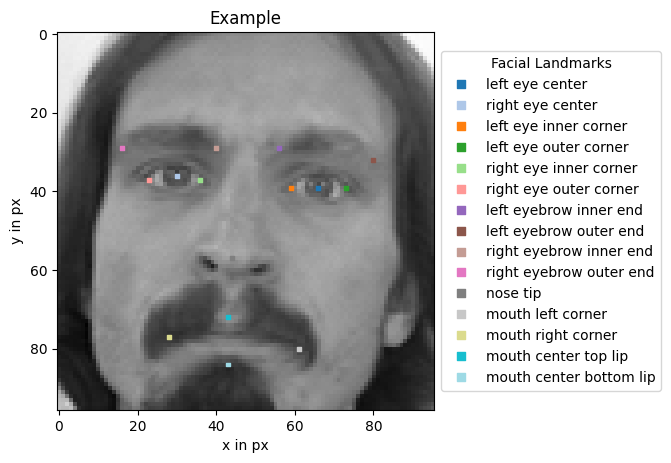

In [6]:
plt.show(plotImageWithLabels(X[0], y[0].astype(np.int8), "Example"))

# Plot fully labeled images

In [8]:
# only clean data
a, b = np.where(y == -1)
i = np.unique(a)  # indices of the unclean images
i = np.delete(np.arange(len(X)), i)

# random indices
n = 100
indicies = np.sort(np.random.choice(i, n, replace=False))
print(indicies)

for i in indicies:
    saveImageWithLabels(X[i], y[i].astype(np.int8), f"Image no.: {i}", f"../data/sampleImages/rawCleanImages/{i}.png")

[  32   33   49   54  151  156  178  223  275  307  308  345  371  386
  432  457  465  479  510  511  522  547  599  617  623  625  639  679
  724  726  733  771  798  804  806  808  815  848  851  893  907  937
  943  962  965 1001 1003 1021 1034 1098 1125 1140 1164 1167 1184 1188
 1193 1234 1249 1266 1274 1310 1315 1339 1346 1349 1354 1361 1375 1378
 1395 1404 1446 1469 1499 1539 1666 1680 1689 1698 1702 1710 1755 1758
 1796 1826 1832 1955 1993 2024 2042 2046 2074 2106 2121 2131 2162 2203
 2204 2260]


# Plot partial labeled images

In [14]:
# only unclean data
a, b = np.where(y == -1)
i = np.unique(a)  # indices of the unclean images

# random indices
n = 100
indicies = np.sort(np.random.choice(i, n, replace=False))
print(indicies)

for i in indicies:
    saveImageWithLabels(X[i], y[i].astype(np.int8), f"Image no.: {i}", f"../data/sampleImages/rawUncleanImages/{i}.png")

[1738 1920 1979 2023 2289 2374 2464 2470 2574 2576 2622 2641 2648 2862
 3036 3064 3238 3244 3262 3263 3296 3337 3398 3442 3443 3462 3489 3652
 3698 3786 3820 3837 3838 3865 3933 3946 3957 4026 4046 4176 4238 4273
 4300 4303 4321 4450 4538 4571 4574 4640 4650 4692 4754 4788 4855 4880
 4904 4944 4972 5027 5032 5203 5215 5389 5392 5406 5426 5462 5478 5500
 5509 5541 5546 5653 5710 5739 5795 5832 6085 6202 6212 6214 6268 6353
 6370 6482 6537 6624 6664 6686 6695 6706 6750 6757 6842 6893 6915 6935
 7009 7034]


# Plot fully labeled augmented images

In [15]:
from util.dataUtil import loadAugmentedData
xa,ya = loadAugmentedData()

# random indices
n = 100
indicies = np.sort(np.random.choice(len(xa), n, replace=False))
print(indicies)

for i in indicies:
    saveImageWithLabels(xa[i], ya[i].astype(np.int8), f"Image no.: {i}", f"../data/sampleImages/augmentedImages/{i}.png")

[   87   185   257   311   625   661   944   950  1170  1605  1731  1793
  2017  2099  2207  2221  2356  2488  2520  2549  2672  2675  2905  2963
  3064  3114  3167  3220  3369  3563  3750  3765  3942  4085  4090  4121
  4379  4382  4475  4540  4676  4691  4872  4995  5034  5039  5053  5121
  5281  5404  5450  5715  5746  6007  6189  6278  6339  6386  6462  6465
  6522  6619  6647  6650  6711  6716  6795  7002  7010  7059  7184  7383
  7410  7782  8073  8138  8168  8279  8415  8486  8547  8559  8587  8974
  9050  9158  9248  9291  9355  9513  9741 10107 10111 10291 10330 10339
 10400 10606 10627 10646]


# Statistics

In [9]:
annotation_count = annotations.notnull().sum(axis=1)

In [10]:
# drop images with less then 4 annotations
annotation_count.drop(annotation_count.index[annotation_count < 8], inplace=True)

# display number of images with different number of annotations
print(annotation_count.value_counts().sort_index())

# from which image to which image are only 4 annotations?
annotation_count_4 = annotation_count.loc[annotation_count == 8]
annotation_count_4_index = annotation_count_4.index.to_numpy()
#np.unique(annotation_count_4_index[:-1] - annotation_count_4_index[1:], return_index=True, return_counts=True)
#np.where(annotation_count_4_index[:-1] - annotation_count_4_index[1:] == -2) + annotation_count_4_index[0]
print(f"\n4 annotations from image {annotation_count_4_index[0]} to {annotation_count_4_index[-1]}")

8     4755
10       2
16       2
18       5
20       3
22       8
24       9
26      28
28      87
30    2140
dtype: int64

4 annotations from image 2284 to 7048


In [11]:
annotation_count.loc[annotation_count == 28]

210     28
350     28
499     28
512     28
810     28
        ..
2233    28
2237    28
2244    28
2279    28
2280    28
Length: 87, dtype: int64

# Trying to fill missing values

In [64]:
annotations_ffill = annotations.fillna(method='ffill')

def showImageWithFill(n):
    annotation_points_full = annotations_ffill.iloc[n].to_numpy()
    x = annotation_points_full[::2].astype(np.int8)
    y = annotation_points_full[1::2].astype(np.int8)
    plt.show(plot_image_with_annotations(images.iloc[n], x, y, f"Image no.: {n}"))

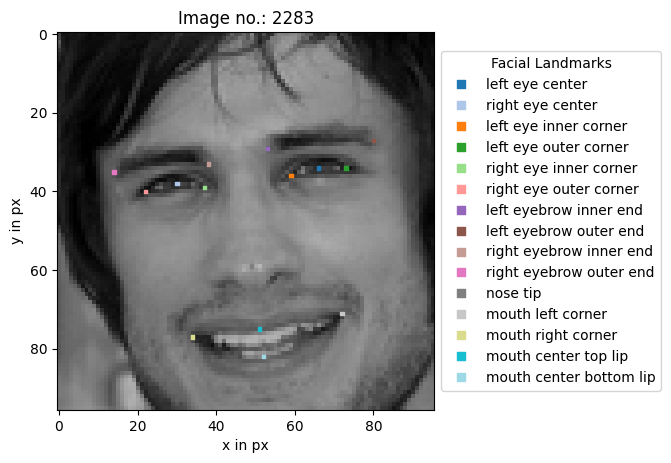

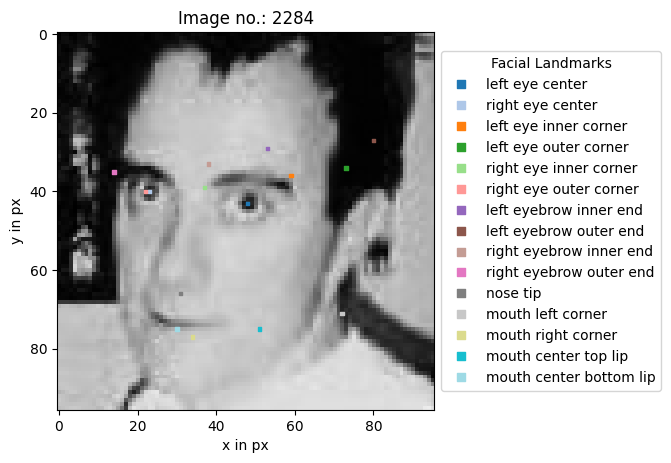

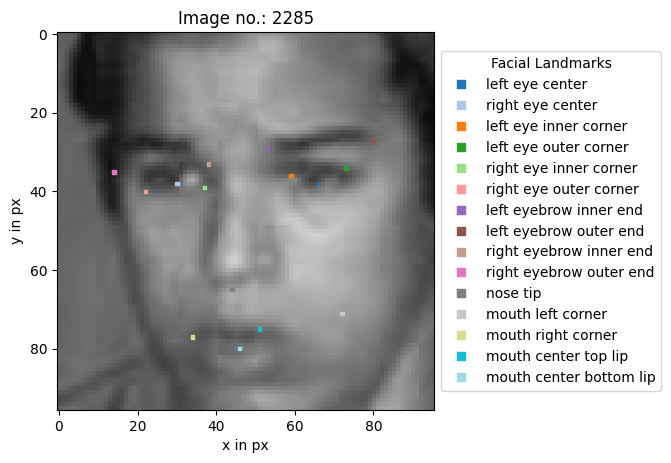

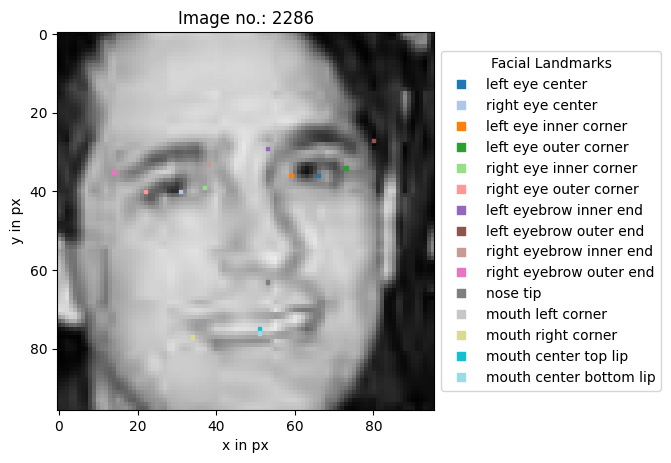

In [69]:
showImageWithFill(2283)
showImageWithFill(2284)
showImageWithFill(2285)
showImageWithFill(2286)